# Hierarchical Clustering Analysis of continuous variables

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:

import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")
import pandas as pd
df = pd.read_excel("jobrate.xlsx")
df.head()

,Communication_Skills,Problem_Solving,Learning_Ability,Judgement_under_Pressure,Observational_Skills,Willingness_to_Confront_Problems,Interest_in_People,Interpersonal_Sensitivity,Desire_for_Self_Improvement,Appearance,Dependability,Physical_Ability,Integrity,Overall_Rating
0,2,6,8,3,8,8,5,3,8,7,9,8,6,7
1,7,4,7,5,8,8,7,6,8,5,7,6,6,7
2,5,6,7,5,7,8,6,3,7,7,5,8,7,5
3,6,7,8,6,9,7,7,7,9,8,8,9,9,7
4,9,9,9,9,7,7,9,8,8,7,8,8,8,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Communication_Skills              103 non-null    int64
 1   Problem_Solving                   103 non-null    int64
 2   Learning_Ability                  103 non-null    int64
 3   Judgement_under_Pressure          103 non-null    int64
 4   Observational_Skills              103 non-null    int64
 5   Willingness_to_Confront_Problems  103 non-null    int64
 6   Interest_in_People                103 non-null    int64
 7   Interpersonal_Sensitivity         103 non-null    int64
 8   Desire_for_Self_Improvement       103 non-null    int64
 9   Appearance                        103 non-null    int64
 10  Dependability                     103 non-null    int64
 11  Physical_Ability                  103 non-null    int64
 12  Integrity                         10

## With original data

### With actives columns

In [4]:
#variables actives
D = df[df.columns[:-1]]

In [5]:
from scientisttools import VARHCA

In [6]:
res_varhca = VARHCA(n_clusters=4,matrix_type="completed",metric="euclidean",method="ward",parallelize=False)
# Instanciation
res_varhca.fit(D)

VARHCA(n_clusters=4)

### Colonnes supplémentaires

In [7]:
Xsup = df[df.columns[-1]]
Xsup.head()

0    7
1    7
2    5
3    7
4    8
Name: Overall_Rating, dtype: int64

In [8]:
res_varhca.transform(Xsup)

,1,2,3,4
Overall_Rating,0.40835,0.415382,0.386838,0.257862


### With all original data

In [9]:
varhca2 = VARHCA(n_clusters=4,var_sup=13,matrix_type="completed",metric="euclidean",method="ward",parallelize=False)
varhca2.fit(df)

VARHCA(n_clusters=4, var_sup=13)

In [10]:
varhca2.corr_sup_

,1,2,3,4
Overall_Rating,0.40835,0.415382,0.386838,0.257862


## With correlation matrix

In [11]:
corr_mat = df.corr()
varhca3 = VARHCA(n_clusters=4,var_sup=13,matrix_type="correlation",metric="euclidean",method="ward",parallelize=False)
varhca3.fit(corr_mat)

VARHCA(matrix_type='correlation', n_clusters=4, var_sup=13)

In [12]:
varhca3.corr_sup_

,1,2,3,4
Overall_Rating,0.40835,0.415382,0.386838,0.257862


## With covariance matrix

In [13]:
cov_mat = df.corr()
varhca4 = VARHCA(n_clusters=4,var_sup=13,matrix_type="covariance",metric="euclidean",method="ward",parallelize=False)
varhca4.fit(cov_mat)

VARHCA(matrix_type='covariance', n_clusters=4, var_sup=13)

In [14]:
varhca4.corr_sup_

,1,2,3,4
Overall_Rating,0.40835,0.415382,0.386838,0.257862


## Dendrogram

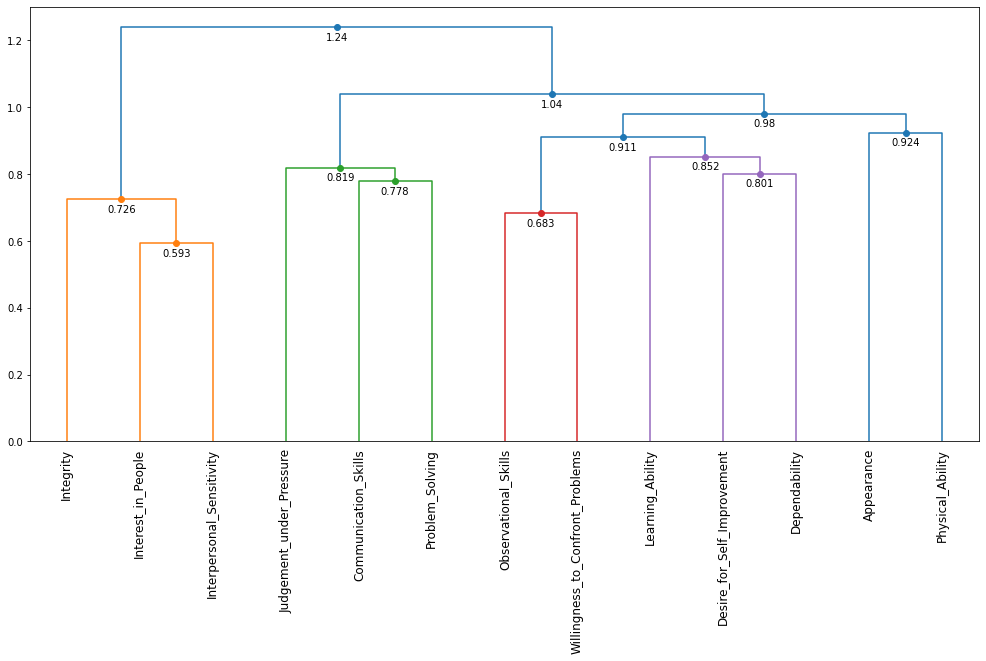

In [15]:
from scientisttools import plot_dendrogram
import matplotlib.pyplot as plt
fig, axe = plt.subplots(figsize=(17,8))
plot_dendrogram(res_varhca,ax=axe,leaf_rotation=90)
plt.show()